# Project RISK

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
import pingouin as pg


In [2]:
# Load the first csv file
csvpath = 'Dataset for phishing detection.csv' 
df = pd.read_csv("Dataset for phishing detection.csv",sep=",")

print(df.head())
print(df.shape)
print(df.dtypes)
#We have 10 000 urls and 75 features.

# Display the name of all features, isolate class feature
feat_names = df.columns.tolist()
feat_names.remove("phishing")
phishing = df['phishing'].unique().astype(str)
print(feat_names)
print(phishing)

# print(df["phishing"])
# phishing feature seems to refer to a phishing webpage when equal to 1 and to refer to a legitimate webpage when equal to 0.


   num_dots_url  num_hyph_url  num_underline_url  num_slash_url  \
0             1             0                  0              1   
1             2             1                  0              1   
2             1             0                  0              1   
3             5             1                  0              2   
4             2             0                  0              1   

   num_questionmark_url  num_equal_url  at_sign_url  num_and_url  \
0                     0              0            0            0   
1                     0              0            0            0   
2                     0              0            0            0   
3                     0              0            0            0   
4                     0              0            0            0   

   num_exclamation_url  num_space_url  ...  tilde_param  num_comma_param  \
0                    0              0  ...            0                0   
1                    0              

In [3]:
# summary of the dataset
df.describe()

,num_dots_url,num_hyph_url,num_underline_url,num_slash_url,num_questionmark_url,num_equal_url,at_sign_url,num_and_url,num_exclamation_url,num_space_url,...,tilde_param,num_comma_param,num_plus_param,num_asterisk_param,num_dollar_param,num_percent_param,length_param,tld_in_param,num_param,phishing
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.285000,0.635200,0.20960,1.906400,0.187700,0.421300,0.023000,0.234200,0.003500,0.000900,...,0.0004,0.00060,0.002400,0.000500,0.000600,0.235600,17.140600,0.070200,0.383100,0.500000
std,1.595816,1.808383,1.03217,2.112791,0.429287,1.216205,0.151239,0.961583,0.088817,0.038721,...,0.0400,0.04472,0.100972,0.026454,0.031619,1.572177,60.429339,0.255497,1.131664,0.500025
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,3.000000,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22.000000,25.000000,24.00000,49.000000,4.000000,14.000000,2.000000,13.000000,4.000000,3.000000,...,4.0000,4.00000,7.000000,2.000000,2.000000,46.000000,865.000000,1.000000,14.000000,1.000000


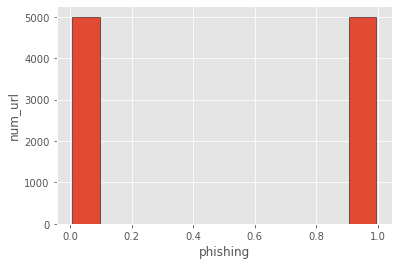

In [4]:
# histogram of feature phishing
plt.style.use('ggplot')
plt.hist(df['phishing'], bins=10,rwidth=0.9,edgecolor='black')
plt.xlabel('phishing')
plt.ylabel('num_url')
plt.show()


# Correlation Matrix

<AxesSubplot:>

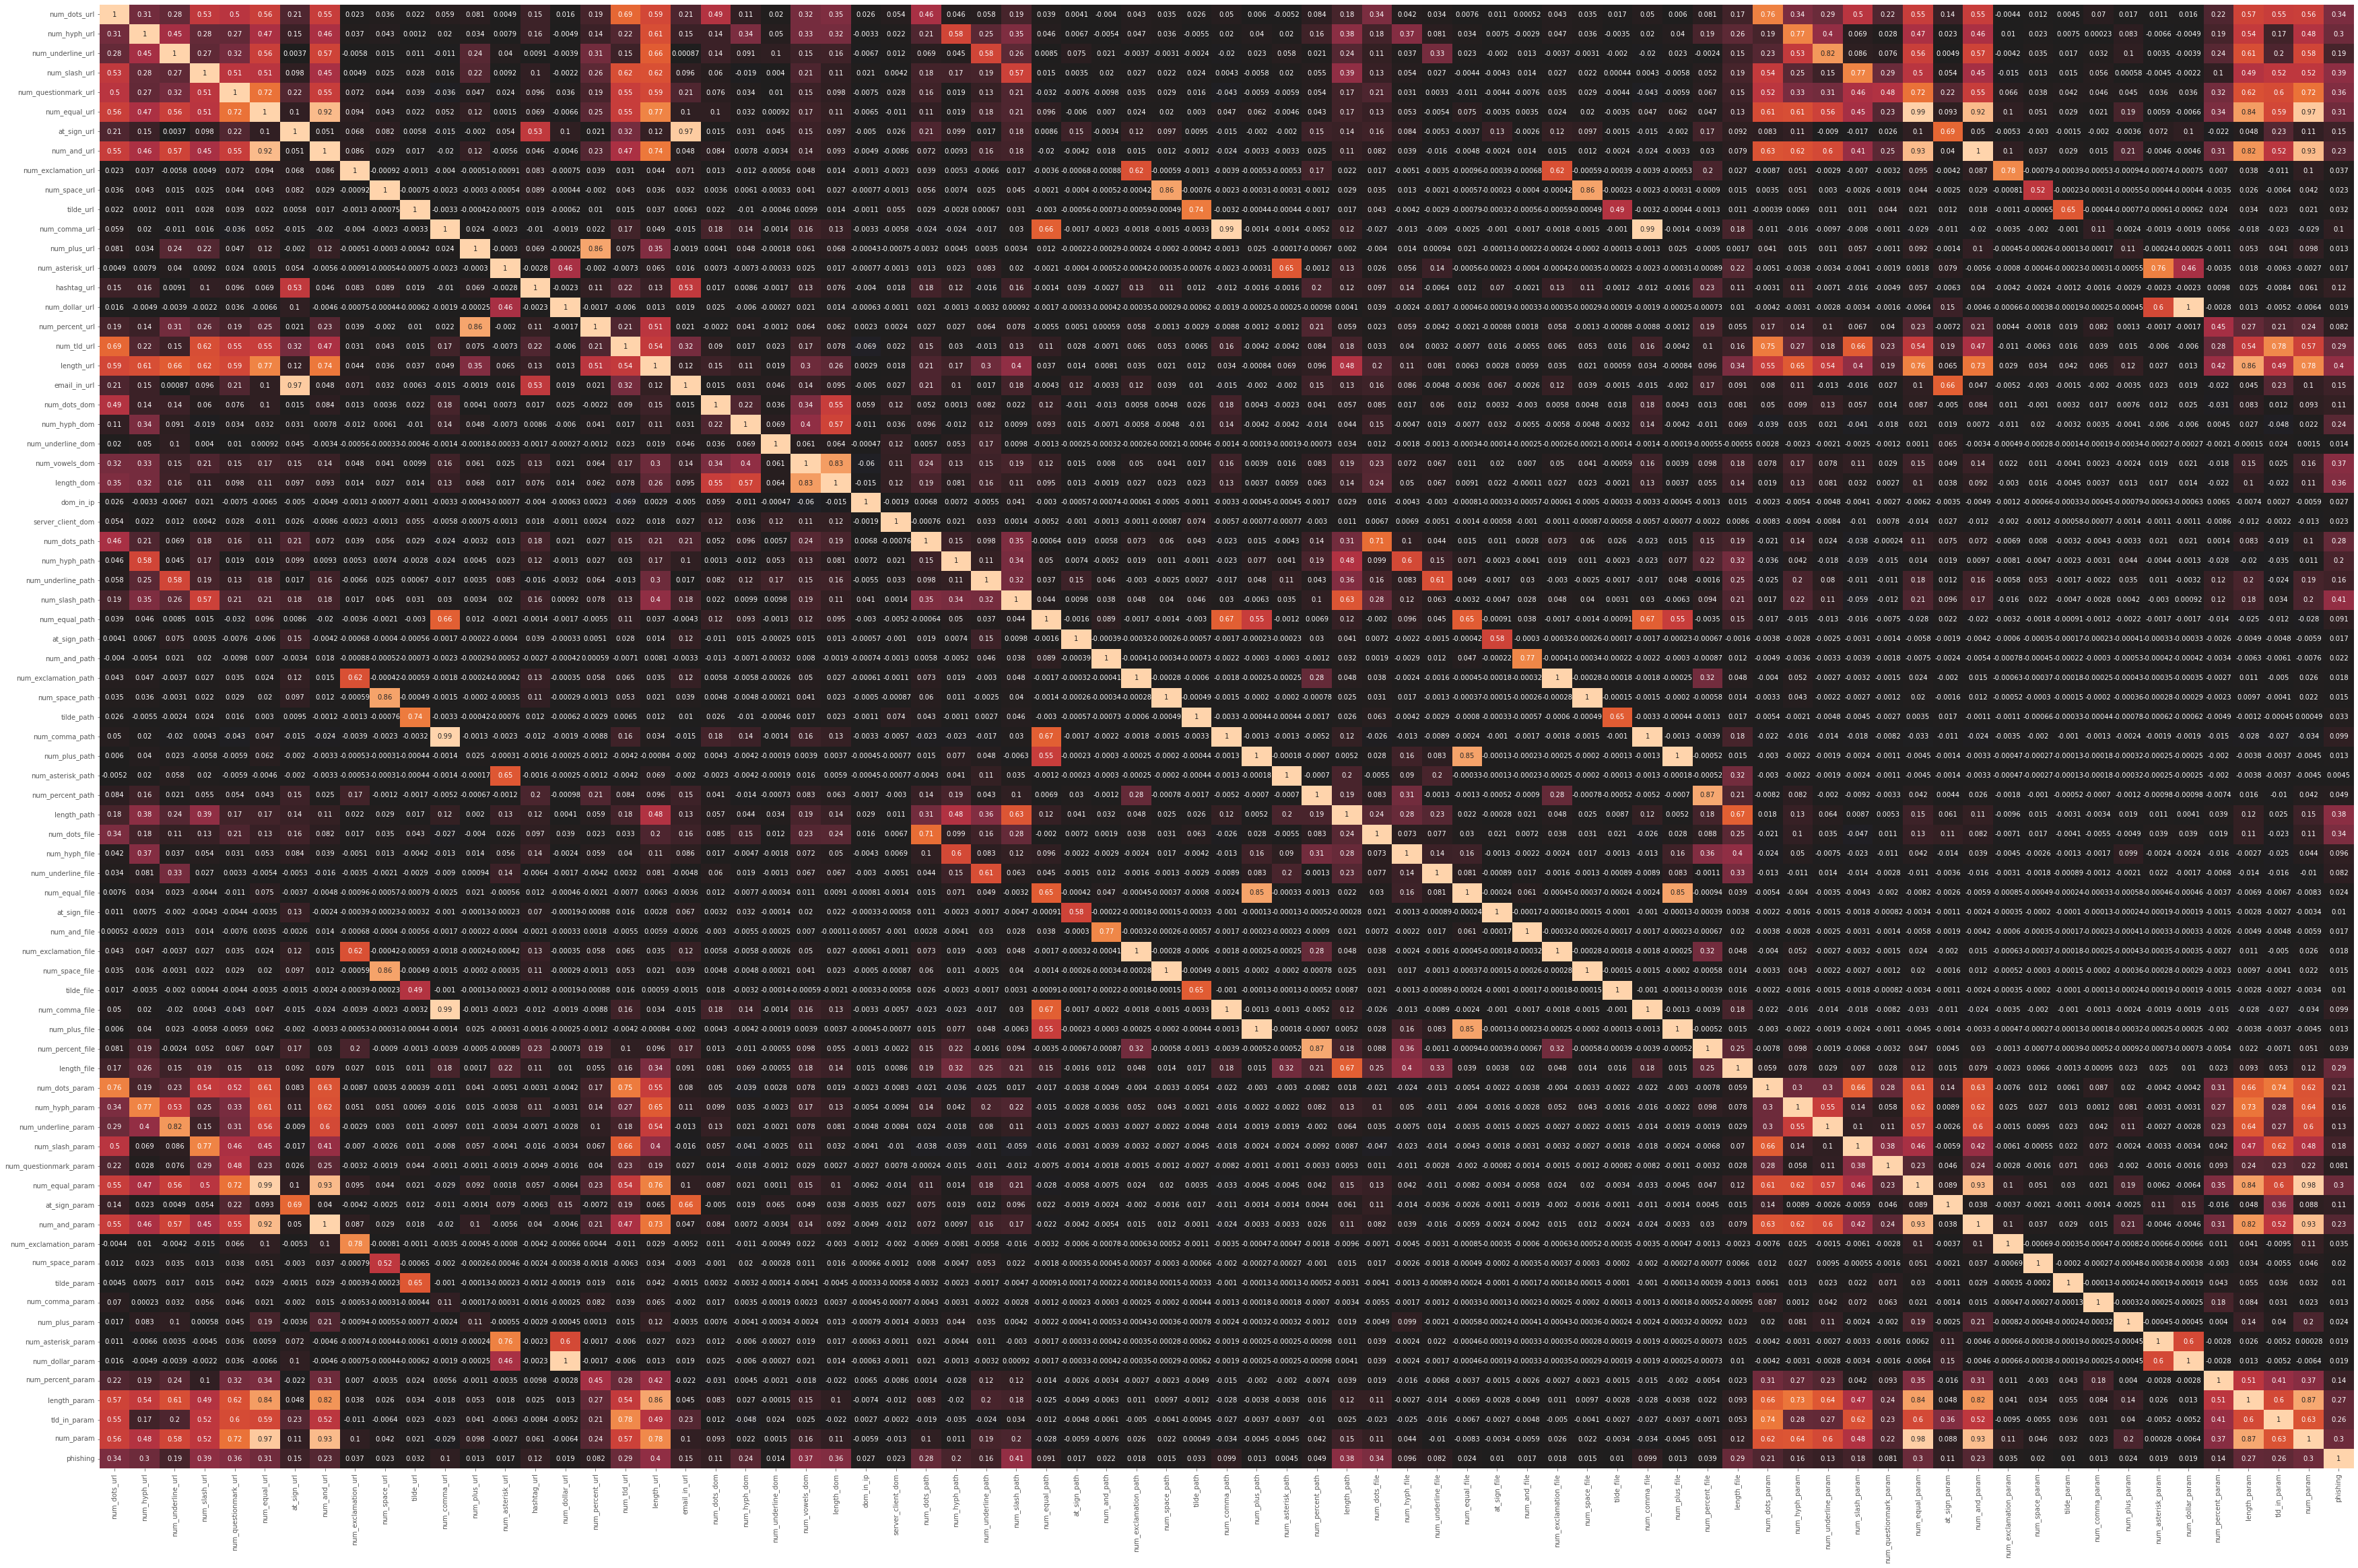

In [25]:
corr_matrix2 = df.corr()
#print(corr_matrix2.head())
fig,axes = plt.subplots(figsize=(60,40))
sns.heatmap(corr_matrix2,center=0,cbar=False,annot=True)

# Partial correlation matrix

<AxesSubplot:>

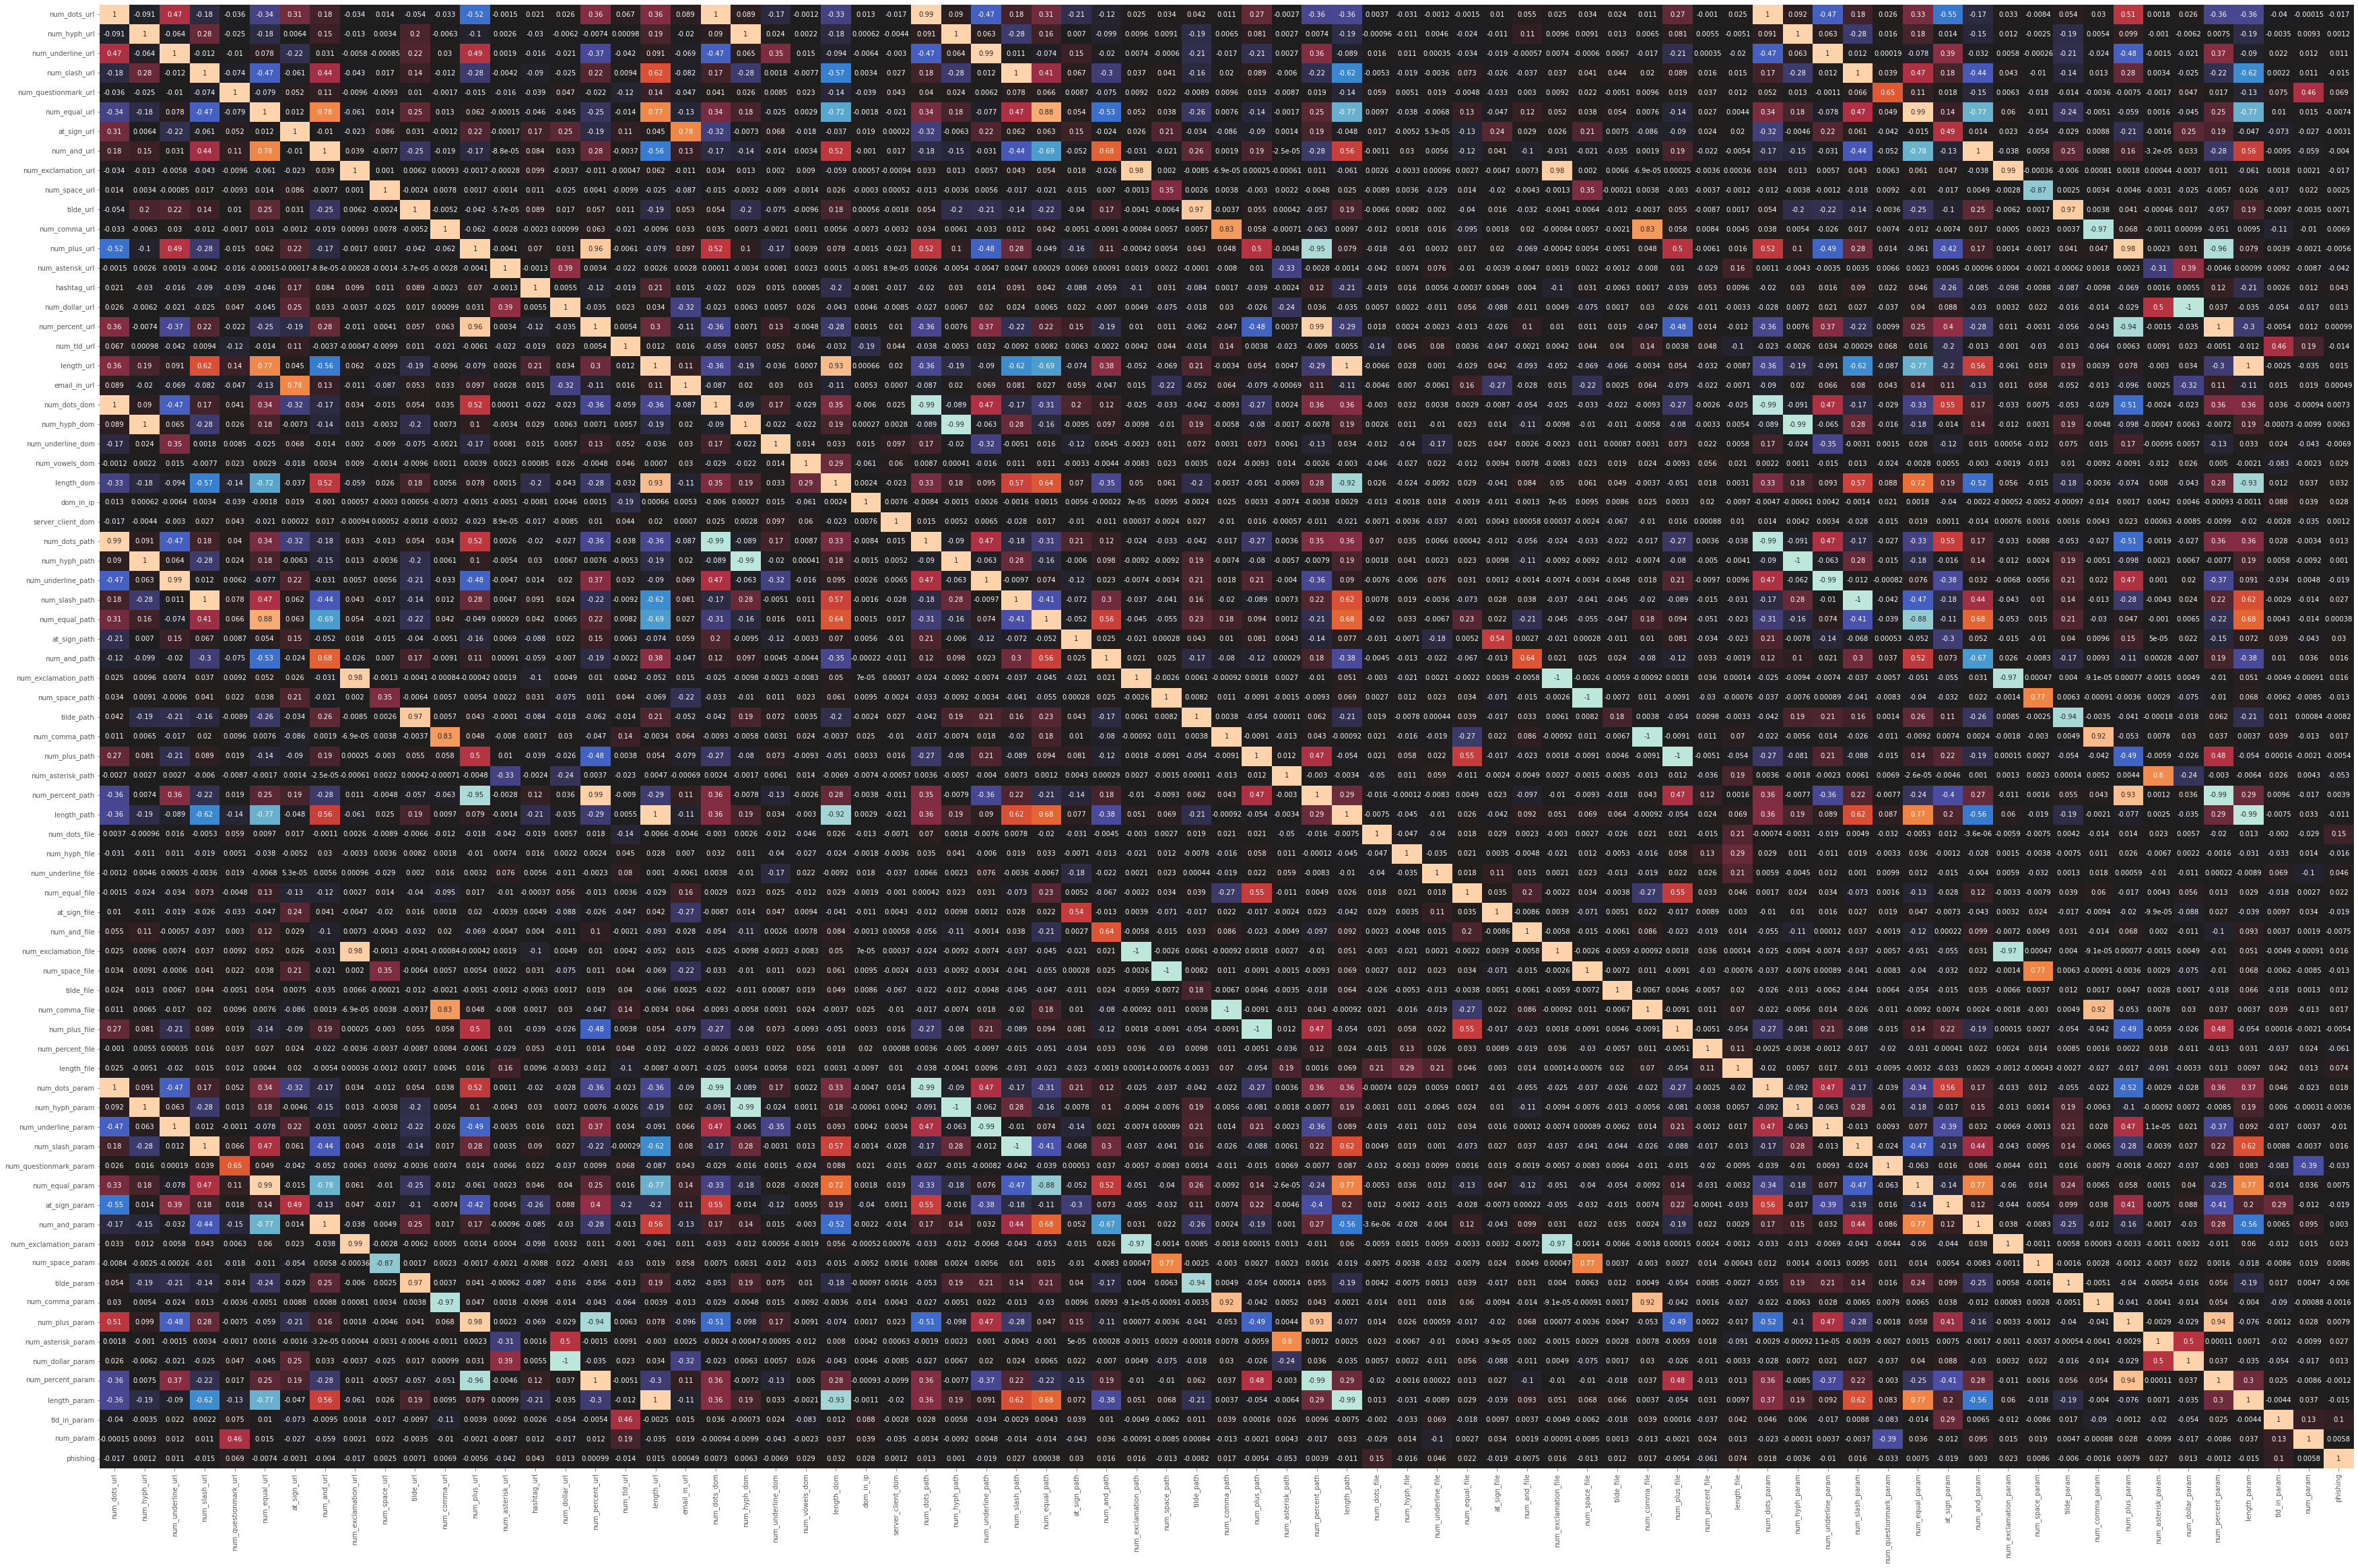

In [23]:
corr_matrix3 = pg.pcorr(df)
#print(corr_matrix3)
fig,axes = plt.subplots(figsize=(60,40))
sns.heatmap(corr_matrix3,center=0,annot=True, cbar=False)

# KNN Classification

In [7]:
scaler = StandardScaler()
dfn = df.copy()
dfn[feat_names] = scaler.fit_transform(dfn[feat_names])

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(dfn[feat_names], df["phishing"], test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

#False positive and True positive rate for ROC curve
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_predict)
roc_auc1 = roc_auc_score(y_test, y_predict)


[[949  62]
 [183 806]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1011
           1       0.93      0.81      0.87       989

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Accuracy: 0.8775


# Decision Tree Classifier

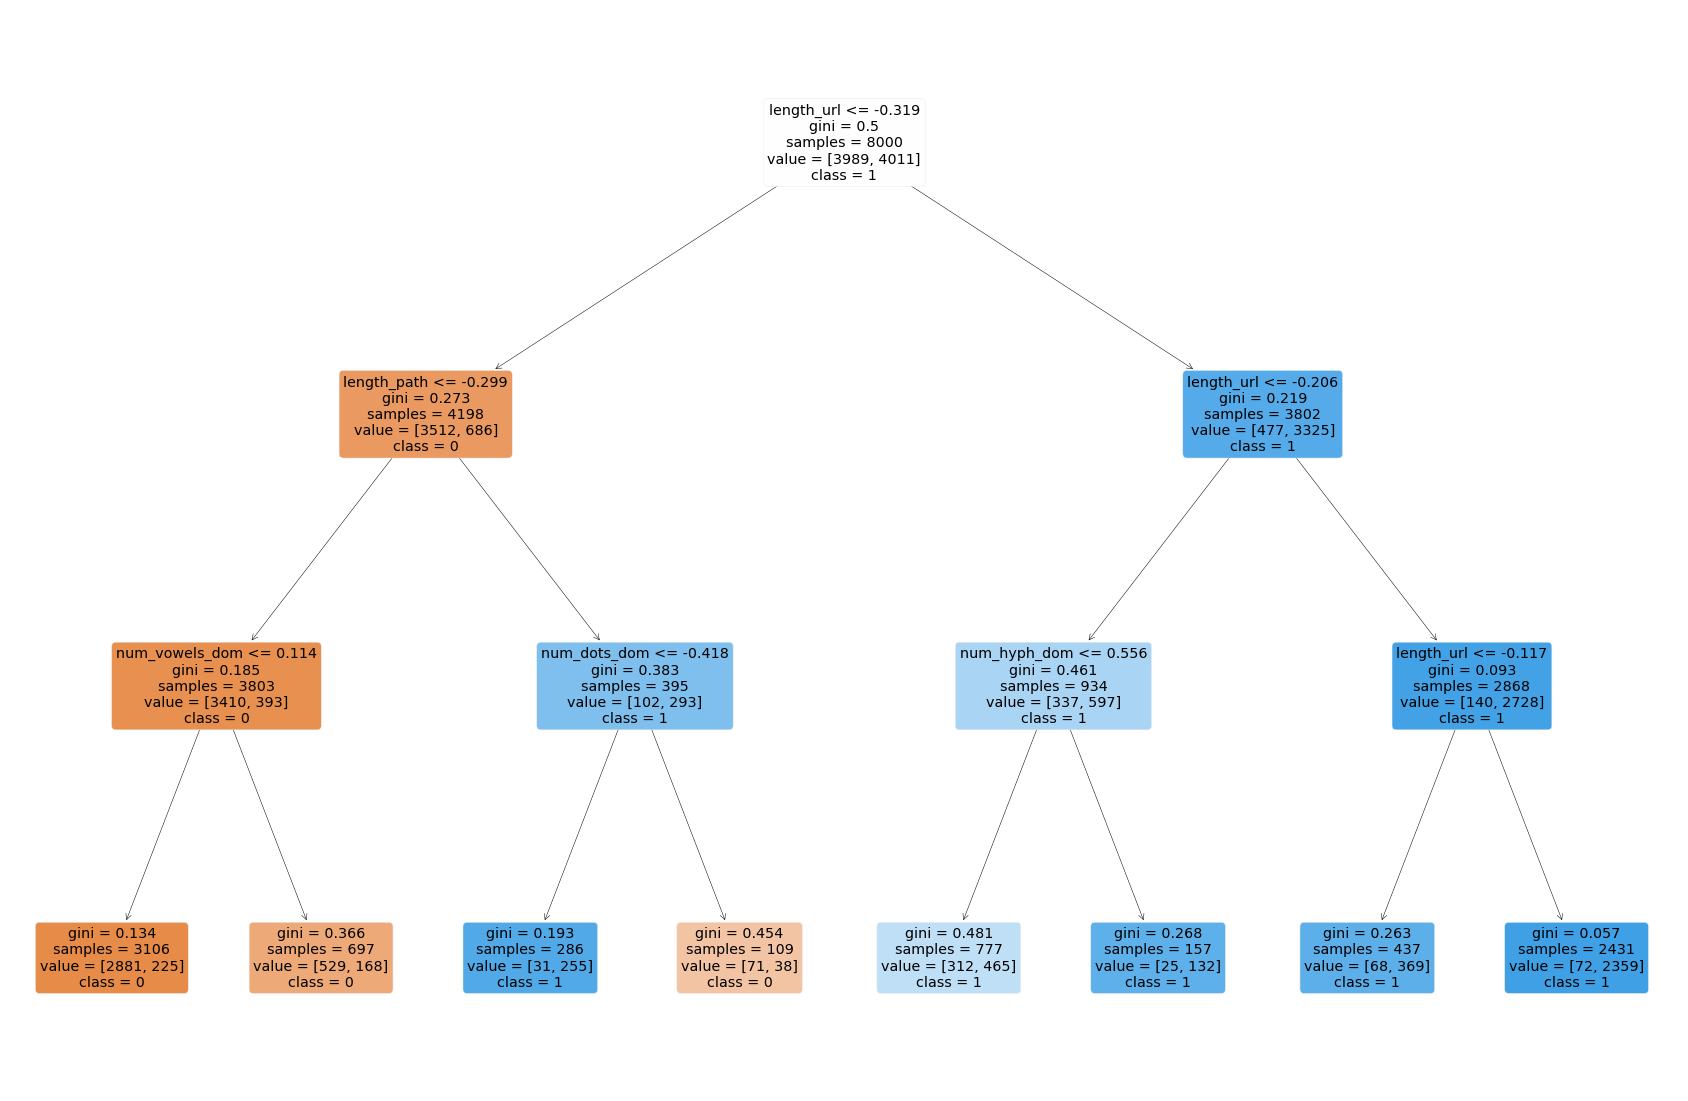

In [8]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=40)
clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
from sklearn import tree


fig, ax = plt.subplots(figsize=(30, 20))

tree.plot_tree(clf,
               feature_names = feat_names, 
               class_names= phishing,
               rounded=True, 
               filled = True);
plt.show()

In [9]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

#False positive and True positive rate for ROC curve
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)


Train data accuracy: 0.882625
Test data accuracy: 0.8665
[[868 143]
 [124 865]]


In [26]:
# Predict Accuracy Score
y_pred = clf.predict(X_test)
    
X_train = pd.DataFrame(X_train, columns = feat_names)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances.head(10)


,feature,importance
18,length_url,0.849
41,length_path,0.114
20,num_dots_dom,0.018
23,num_vowels_dom,0.013
21,num_hyph_dom,0.006
50,tilde_file,0.000
55,num_dots_param,0.000
54,length_file,0.000
53,num_percent_file,0.000
52,num_plus_file,0.000


# Random forest

accuracy_random_Forest : 0.898
precision_random_Forest : 0.898
recall_random_Forest : 0.898
f1-score_random_Forest : 0.898


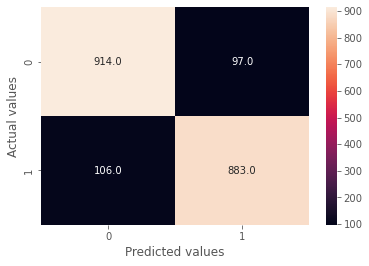

In [11]:
#Setup X and y data
from sklearn.ensemble import RandomForestClassifier
#Fit model
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')

sns.heatmap(cm,annot=True,fmt=".1f")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

estimator =random_forest.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree_test.dot', 
                feature_names = feat_names,
                class_names = phishing,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [27]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances.head(10)

,feature,importance
41,length_path,0.176
18,length_url,0.168
54,length_file,0.145
24,length_dom,0.088
23,num_vowels_dom,0.084
3,num_slash_url,0.057
30,num_slash_path,0.052
0,num_dots_url,0.037
1,num_hyph_url,0.034
71,length_param,0.030


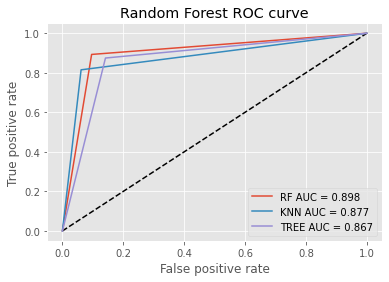

In [13]:
fpr,tpr,thresholds = roc_curve(y_test,Y_prediction)
roc_auc = roc_auc_score(y_test, Y_prediction)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF AUC = {:.3f}'.format(roc_auc))
plt.plot(fpr1, tpr1, label='KNN AUC = {:.3f}'.format(roc_auc1))
plt.plot(fpr2, tpr2, label='TREE AUC = {:.3f}'.format(roc_auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')
plt.show()